In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm



In [3]:
df = pd.read_csv(r"C:\Data science\Salary_Data.csv")
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
print(df.columns)


Index(['YearsExperience', 'Salary'], dtype='object')


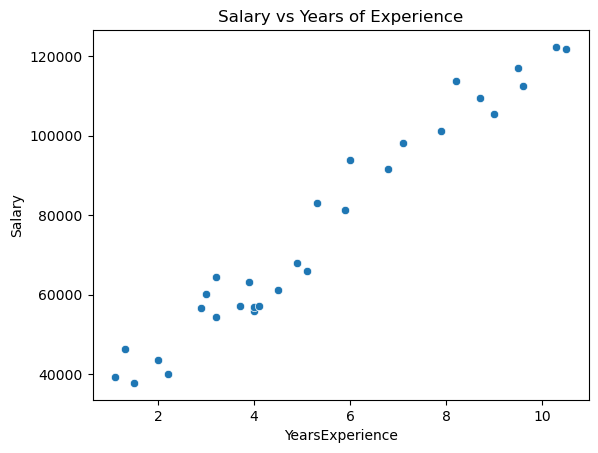

Correlation: 0.9782416184887599


In [5]:
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title("Salary vs Years of Experience")
plt.show()

print("Correlation:", df['YearsExperience'].corr(df['Salary']))

In [6]:
X = df[['YearsExperience']]
y = df['Salary']

Xc = sm.add_constant(X)   # add intercept
model = sm.OLS(y, Xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 25 Dec 2025   Prob (F-statistic):           1.14e-20
Time:                        22:08:06   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     

In [7]:
new_data = pd.DataFrame({'YearsExperience':[1.5, 3.0, 5.0]})
new_data = sm.add_constant(new_data)
preds = model.predict(new_data)

output = pd.DataFrame({'YearsExperience':[1.5,3.0,5.0],
                       'Predicted Salary':preds})
print(output)

# Save predictions
output.to_csv("Salary_hike_predictions.csv", index=False)

   YearsExperience  Predicted Salary
0              1.5      39967.143681
1              3.0      54142.087163
2              5.0      73042.011806
